In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import os
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')  # Replace 'your_student_data.csv' with the actual filename



# Calculate the average score and
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Define the pass/fail criteria based on the average score and create a column
df['pass'] = np.where(df['average_score'] >= 70, 1, 0)  # Assuming 70 is the passing threshold. Adjust as needed!

# # --- Show the result ---
# print(df[['math score', 'reading score', 'writing score', 'average_score', 'pass']].head())
# # ---------------------

# Clean the data
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Convert categorical features
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']  # List of categorical columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Prepare the data for modeling
X = df.iloc[:,:-1]
y = df['pass']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"F1-score: {f1}")
    print("-" * 20)

evaluate_model(y_test, logistic_predictions, "Logistic Regression")
evaluate_model(y_test, forest_predictions, "Random Forest")

--- Logistic Regression ---
Accuracy: 1.0
Confusion Matrix:
[[110   0]
 [  0  90]]
F1-score: 1.0
--------------------
--- Random Forest ---
Accuracy: 1.0
Confusion Matrix:
[[110   0]
 [  0  90]]
F1-score: 1.0
--------------------


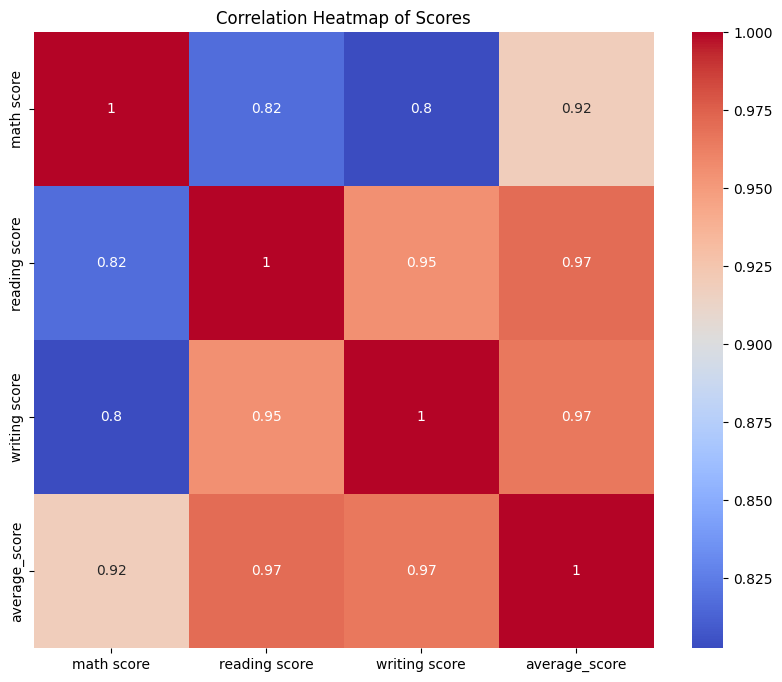

In [27]:
#Data visuvalization using Correlation Heatmap

plt.figure(figsize=(10, 8))
corr_matrix = df[['math score', 'reading score', 'writing score', 'average_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scores')
plt.show()

In [29]:
df=pd.read_csv('')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [30]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [32]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
